### <span style="color:red"> Addressing Dataset Imbalance in Machine Learning Models </span>

NOTE: 
We will use the Bank Churn Dataset and make our predictions using ML Models as well as an ANN with special focus on imbalanced dataset handling techniques!

In [1]:
# Importing relevant modules
import tensorflow as tf
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Data Evaluation

In [2]:
churn_data_original = pd.read_csv("Churn_Modelling.csv")
churn_data_original.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
churn_data_original.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
churn_data = churn_data_original.drop(["RowNumber", "CustomerId", "Surname"], axis=1) # Dropping unuseful columns

In [5]:
for col in churn_data:
    print(f'{col}: {churn_data[col].unique()}') # checking unique values in each column

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

#### Converting Categorical Features into Numerical (OneHotEncoding):

In [6]:
churn_data["Gender"] = [ 1 if i=="Male" else 0 for i in churn_data["Gender"]]  #(1 Male, 0 Female)
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [7]:
geography_dummies = pd.get_dummies(churn_data["Geography"], dtype=int, prefix="ohe_", drop_first=True)
churn_data = pd.concat([churn_data,geography_dummies],axis=1)

In [8]:
churn_data.drop("Geography", axis= 1, inplace=True) # Dropping redundant categorical column
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ohe__Germany,ohe__Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


#### Scaling Dataset values:

In [9]:
scaler = MinMaxScaler()
churn_data_scaled = scaler.fit_transform(churn_data)
churn_data_scaled_df = pd.DataFrame(churn_data_scaled, columns=churn_data.columns)

#### Data Visualization and Correlation Testing:

Text(0.5, 0, '(Exit Status, Active Member)')

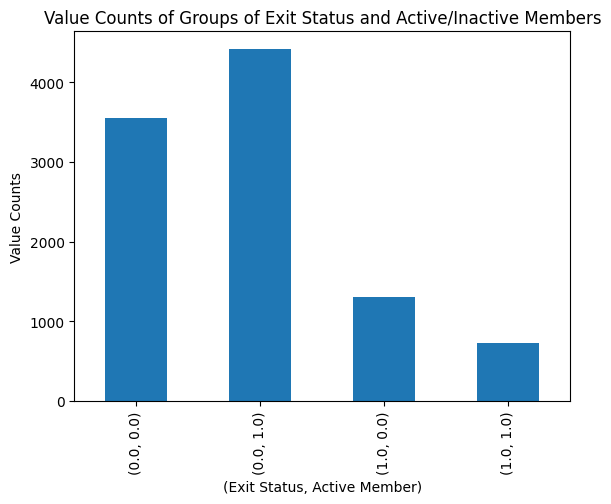

In [10]:
# Bar Plot to check if Activity Status of Members affects Exit
grouped_data = churn_data_scaled_df[['Exited', 'IsActiveMember']].groupby(['Exited', 'IsActiveMember']).value_counts()
grouped_data.plot(kind='bar')
plt.title('Value Counts of Groups of Exit Status and Active/Inactive Members')
plt.ylabel('Value Counts')
plt.xlabel('(Exit Status, Active Member)')

Since the groups (Active and Exited) and (Inactive and Exited) have similar value counts,
there isn't any specific correlation between activity and exiting.

In [11]:
churn_data_scaled_df.corr()[["Exited"]] # Checking correlations

,Exited
CreditScore,-0.027094
Gender,-0.106512
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000


*No specific strong correlations, hence we will use all of the features!*

#### Imbalance Testing:

In [12]:
churn_data_scaled_df['Exited'].value_counts()

Exited
0.0    7963
1.0    2037
Name: count, dtype: int64

**We can see that the dataset is skewed, hence we will try out multiple methods for imbalance handling!**

*First we can check how the various models perform without any imbalance handling.*

### Testing ML Models (Without Imbalance Handling):

In [13]:
ml_models = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'GaussianNB':{
        'model': GaussianNB(),
        'params':{
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    }
}

def ml_model_testor(df):
    scores = []
    xtrain, xtest, ytrain, ytest = train_test_split(df.drop("Exited", axis=1),df["Exited"],test_size=0.2, stratify=df["Exited"])
    for model_name, mp in ml_models.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(xtrain, ytrain)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
        
    scores_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    return scores_df

In [14]:
scores = ml_model_testor(churn_data_scaled_df)
scores

,model,best_score,best_params
0,svm,0.852375,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.861500,{'n_estimators': 100}
2,logistic_regression,0.810375,{'C': 1}
3,GaussianNB,0.825375,{'var_smoothing': 0.0001232846739442066}


We can see RandomForest performs the best out of the selected Models.

We will now try predictions with a Neural Network!

##### Functions for Neural Network tasks:

In [15]:
def ann_creator(xtrain, ytrain, xtest, ytest):
    # Model Creation
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(6, input_shape=(11,), activation="relu"),
            tf.keras.layers.Dense(3, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
                                ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(xtrain,ytrain,epochs=100, verbose=0)
    # model.evaluate(xtest,ytest)
    
    # Converting final predictions into binary values
    preds= []
    final_preds = model.predict(xtest)
    for item in final_preds:
        if item>=0.5:
            preds.append(1)
        else:
            preds.append(0)
    
    return preds, ytest

In [16]:
def ann_result_calculator(df):
    xtrain, xtest, ytrain, ytest = train_test_split(df.drop("Exited", axis=1),df["Exited"],test_size=0.2)
    preds, truth = ann_creator(xtrain,ytrain,xtest,ytest)
    # Confusion Matrix
    cm = confusion_matrix(truth, preds)
    sns.heatmap(cm, annot=True, fmt='.1f')
    plt.xlabel("Predictions")
    plt.ylabel("Truth")
    plt.title("Confusion Matrix")
    # Classification Report
    cr = classification_report(truth, preds)
    print(cr)
    return preds, truth

### Results for ANN without handling Imbalance:

We will evaluate ANN performance using Classification Report and Confusion Matrix.

E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      1601
         1.0       0.79      0.36      0.49       399

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.70      2000
weighted avg       0.85      0.85      0.83      2000



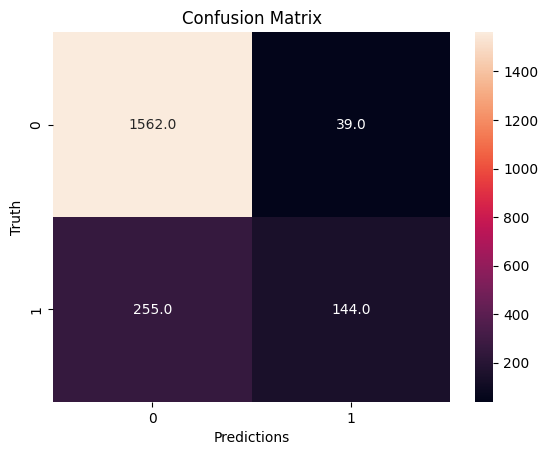

In [17]:
preds, truth = ann_result_calculator(churn_data_scaled_df)

#### *Let us now employ some imbalance handling techniques!*

### <span style="color:red">1. Undersampling: </span>

In [18]:
data_churn0 = churn_data_scaled_df[churn_data_scaled_df['Exited']==0]
data_churn1 = churn_data_scaled_df[churn_data_scaled_df['Exited']==1]

In [19]:
data_churn0.shape, data_churn1.shape

((7963, 12), (2037, 12))

In [20]:
churn0_samples = data_churn0.sample(len(data_churn1))
churn_data_final_unsampled = pd.concat([data_churn1, churn0_samples], axis=0)
churn_data_final_unsampled.shape

(4074, 12)

**ML Model Results (Undersampling):**

In [21]:
scores_undersampling = ml_model_testor(churn_data_final_unsampled)
scores_undersampling

,model,best_score,best_params
0,svm,0.742565,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.764967,{'n_estimators': 50}
2,logistic_regression,0.707583,{'C': 5}
3,GaussianNB,0.710959,{'var_smoothing': 0.001}


The performance of the models falls rather than improving!! Let us try for ANN:

**ANN Results (Undersampling):**

E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70       405
         1.0       0.71      0.70      0.70       410

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815



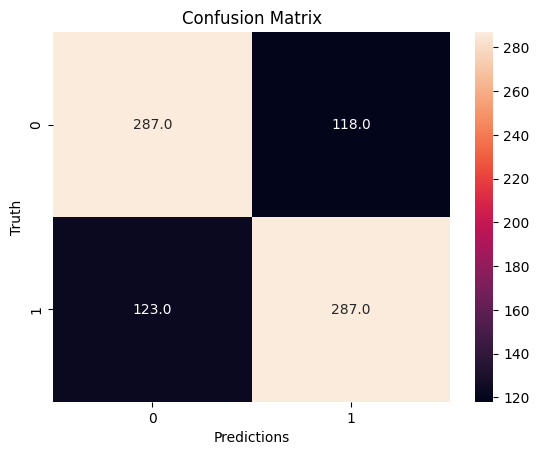

In [22]:
preds_unsampled, truth_unsampled = ann_result_calculator(churn_data_final_unsampled)

We can see an improvement in the F1 score for ANN!

### <span style="color:red">2. Oversampling:</span>
##### <span style="color:green">(2.1) Duplicate Copying</span>

In [23]:
churn1_samples = data_churn1.sample(len(data_churn0), replace=True)
churn_data_final_ovrsampled = pd.concat([data_churn0, churn1_samples], axis=0)
churn_data_final_ovrsampled.shape

(15926, 12)

**ML Model Results(Oversampling with Duplicates):**

In [24]:
scores_oversampling = ml_model_testor(churn_data_final_ovrsampled)
scores_oversampling

,model,best_score,best_params
0,svm,0.774961,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.937834,{'n_estimators': 100}
2,logistic_regression,0.706122,{'C': 10}
3,GaussianNB,0.712794,{'var_smoothing': 1.873817422860383e-05}


Random forest shows significant improvement but all the others have reduced scores!

**ANN Results(Oversampling):**

E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77      1597
         1.0       0.76      0.81      0.78      1589

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



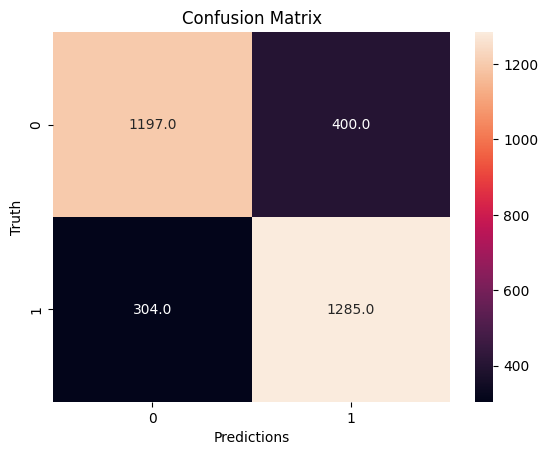

In [25]:
preds_ovrsampled, truth_oversampled = ann_result_calculator(churn_data_final_ovrsampled)

This technique also improves the F1 Score for ANN to a similar extent as undersampling!

##### <span style="color:green">(2.1) SMOT:</span>

In [26]:
smote = SMOTE()
x = churn_data_scaled_df.drop('Exited', axis=1)
y = churn_data_scaled_df['Exited']
x_smote, y_smote = smote.fit_resample(x, y)
y_smote.value_counts()

Exited
1.0    7963
0.0    7963
Name: count, dtype: int64

In [27]:
x_smote["Exited"] = y_smote # Combining all values into a DataFrame

**ML Model Results(Oversampling with SMOT):**

In [28]:
scores_oversampling_smote = ml_model_testor(x_smote)
scores_oversampling_smote

,model,best_score,best_params
0,svm,0.774725,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.891444,{'n_estimators': 100}
2,logistic_regression,0.710754,{'C': 10}
3,GaussianNB,0.725667,{'var_smoothing': 0.0001519911082952933}


No significant improvement!

**ANN Results(Oversampling with Duplicates):**

E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79      1601
         1.0       0.80      0.74      0.77      1585

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



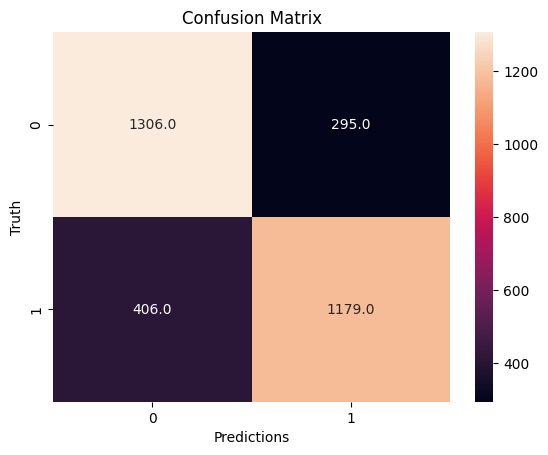

In [29]:
preds_smote, truth_smote = ann_result_calculator(x_smote)

We see improvement in the F1 score for ANN!

### <span style="color:red">3. Ensemble Method for ANN:</span>

In [30]:
x_train_allbatch, xtest_allbatch, y_train_allbatch, ytest_allbatch = train_test_split(churn_data_scaled_df.drop("Exited", axis=1),churn_data_scaled_df["Exited"],test_size=0.2)

We split the dataset into train and test, now we will only use the train set to train all the batches and then finally use the test set on all the batches and take the majority vote to compare with the truth values to check if the F1 Score improves.

In [31]:
x_train_allbatch["Exited"] = y_train_allbatch
df_train = x_train_allbatch.copy()

In [32]:
df_train["Exited"].value_counts()

Exited
0.0    6372
1.0    1628
Name: count, dtype: int64

In [33]:
# Creating batches according to the value counts to balance the dataset
df_majority = df_train[df_train["Exited"]==0]
df_minority = df_train[df_train["Exited"]==1]
batch_list = []

for j in range(0,len(df_majority),1637): # 1637 can be replaced with the required batch size.
    df_combined = pd.concat([df_majority[j:j+1637], df_minority], axis=0)
    batch_list.append(df_combined) # compiling all batches into a list

In [34]:
def batch_ann(xtrain, ytrain):
    # Model Creation
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(6, input_shape=(11,), activation="relu"),
            tf.keras.layers.Dense(3, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
                                ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(xtrain,ytrain,epochs=100, verbose=0)

    # Converting final predictions into binary values
    preds= []
    final_preds = model.predict(xtest_allbatch)
    for item in final_preds:
        if item>=0.5:
            preds.append(1)
        else:
            preds.append(0)
    
    return preds

In [35]:
# Now we will iterate over the list and train each of our models whilst storing the predictions for each in another list.
batchwise_preds = []
for batch in batch_list:
    xtrain, xtest, ytrain, ytest = train_test_split(batch.drop("Exited", axis=1),batch["Exited"],test_size=0.2)
    batchwise_preds.append(batch_ann(xtrain, ytrain))

E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


E:\python_all\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


In [36]:
# Saving batchwise predictions into seperate variables
b1_preds = batchwise_preds[0]
b2_preds = batchwise_preds[1]
b3_preds = batchwise_preds[2]
b4_preds = batchwise_preds[3]   

final_predictions = []
# Taking majority vote (Note: Incase of 2:2 votes, we're considering the minority class)
for i in range(len(b1_preds)):
    score = 0
    score = b1_preds[i]+b2_preds[i]+b3_preds[i]+b4_preds[i]
    if score>=2:
        final_predictions.append(1)
    else:
        final_predictions.append(0)

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      1591
         1.0       0.45      0.77      0.57       409

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



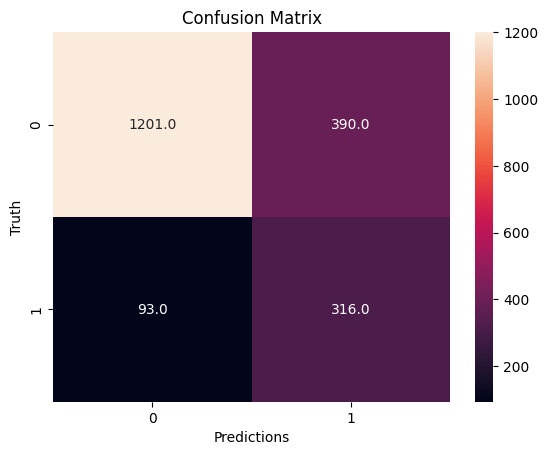

In [37]:
# Performance checks for Ensemble Method
# Confusion Matrix
cm = confusion_matrix(ytest_allbatch, final_predictions)
sns.heatmap(cm, annot=True, fmt='.1f')
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
# Classification Report
cr = classification_report(ytest_allbatch, final_predictions)
print(cr)

This does not show any improvement for the F1 score for ANN.

#### <span style="color:red">Results:</span>
1. Overall out of the considered ML Models, the Random Forest Classifier works best and shows significant improvement when we use Oversampling(Duplication) technique.

2. ANN performs best when we use Oversampling by SMOT method to handle the dataset imbalance.